# IA5008: Sistemas Neuronales
## Assignment 4
### Student info:
- **Name and last name**: Miguel Lara, Andreé Vela

## Antes de empezar

* Crear una carpeta llamada "datasets" y cargar "test_catvnoncat.h5", "train_catvnoncat.h5"


## Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import optimizers
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import ZeroPadding2D
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.utils import np_utils

## Dataset

In [ ]:
def load_data( location ):
  train_dataset = h5py.File( location +  'datasets/train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File(location + 'datasets/test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
  
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
  
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data( 'drive/Shareddrives/IA5008.500 Deep Learning/Assignment 05/' )

y = 1. It's a cat picture.


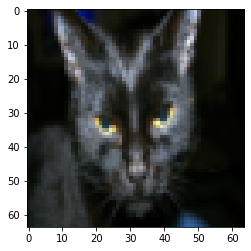

In [ ]:
# Example of a picture

index = 25
plt.imshow( train_x_orig[ index ] )
print( "y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture." )

In [ ]:
# Explore your dataset 

m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print( "Number of training examples: " + str( m_train ) )
print( "Number of testing examples: " + str( m_test ) )
print( "Each image is of size: (" + str( num_px ) + ", " + str( num_px ) + ", 3)" )

print( "train_x_orig shape: " + str( train_x_orig.shape ) )
print( "train_y shape: " + str( train_y.shape ) )
print( "test_x_orig shape: " + str( test_x_orig.shape ) )
print( "test_y shape: " + str( test_y.shape ) )

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


## Resizing and encoding

In [ ]:
# method='biliniear' antialias??
# https://www.tensorflow.org/api_docs/python/tf/image/resize

X_train = tf.image.resize( train_x_orig, [ 224, 224 ] ).numpy()
X_test = tf.image.resize( test_x_orig, [ 224, 224 ] ).numpy()

y_train = np_utils.to_categorical( np.asarray( train_y ).astype( 'float32' ).reshape( ( -1,1 ) ), num_classes = 2 )
y_test = np_utils.to_categorical( np.asarray( test_y ).astype( 'float32' ).reshape( ( -1, 1 ) ), num_classes= 2 ) 

print ("X_train shape: " + str( X_train.shape ) )
print ("y_train shape: " + str( y_train.shape ) )
print ("X_test shape: " + str( X_test.shape ) )
print ("y_test shape: " + str( y_test.shape ) )

X_train shape: (209, 224, 224, 3)
y_train shape: (209, 2)
X_test shape: (50, 224, 224, 3)
y_test shape: (50, 2)


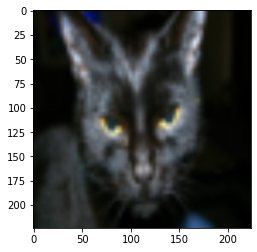

In [ ]:
plt.imshow( X_train[ index ].astype( np.uint8 ) )

## Normalization

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.  


## Parameters


In [ ]:
img_size = X_train.shape[ 1: ] # ( 224, 224, 3 )
batch_size = 50
epochs = 1700

# Sequential model

In [ ]:
# Network building blocks

model = Sequential()  

# 1st layer

# add padding 

model.add( ZeroPadding2D( padding = ( 1, 1 ) ) )
model.add( Conv2D( 
    input_shape = img_size, 
    kernel_size = ( 7, 7 ), 
    filters = 96, 
    activation = 'relu', 
    strides = [ 2, 2 ], 
    padding = 'valid' ) )

model.add( ZeroPadding2D( padding = ( 1, 1 ) ) )
model.add( MaxPooling2D( pool_size = ( 3, 3 ), strides = [ 2, 2 ], padding = 'valid' ) )

# 2nd layer
#model.add( ZeroPadding2D( padding = ( 1, 1 ) ) )
model.add( Conv2D( 
  kernel_size = ( 5, 5 ), 
  filters = 256, 
  activation = 'relu', 
  strides = [ 2, 2 ], 
  padding = 'valid' ) ) 

model.add( ZeroPadding2D( padding = ( 1, 1 ) ) )
model.add( MaxPooling2D( pool_size = ( 3, 3 ), strides = [ 2, 2 ], padding = 'valid' ) )
# model.add( BatchNormalization( axis = 1 ) )

# 3rd layer

model.add( Conv2D( 
    kernel_size = ( 3, 3 ), 
    filters = 384, 
    activation = 'relu', 
    strides = [ 1, 1 ], 
    padding = 'same' ) )

# 4th layer

model.add( Conv2D( 
    kernel_size = ( 3, 3 ), 
    filters = 384, 
    activation = 'relu', 
    strides = [ 1, 1 ], 
    padding = 'same' ) )

# 5th layer

model.add( Conv2D( 
    kernel_size = ( 3, 3 ), 
    filters = 256, 
    activation = 'relu',
    strides = [ 1, 1 ],
    padding = 'same' ) )

model.add( MaxPooling2D( pool_size = ( 3, 3 ), strides = [ 2, 2 ], padding = 'valid' ) )

# Full-connected layers

model.add( Flatten() )
model.add( Dense( 4096, activation = 'relu', activity_regularizer = l2( 0.05 ) ) ) # 
# model.add( Dropout( 0.3 ) ) 
model.add( Dense( 4096, activation = 'relu', activity_regularizer = l2( 0.05 ) ) ) #  
# model.add( Dropout( 0.3 ) ) 
model.add( Dense( 2, activation = 'softmax'))

model.compile( 
    optimizer = optimizers.SGD( learning_rate = 0.01 ),
    loss = 'binary_crossentropy', 
    metrics = [ 'accuracy' ] )
 
# Training configuration, for reference only

history = model.fit( 
    X_train, y_train , 
    epochs = epochs, 
    batch_size = batch_size, 
    verbose = 1, 
    validation_split = 0.1 )

loss, accuracy = model.evaluate( X_test, y_test )

# Output Module

print('Test loss:', loss)
print('Accuracy:', accuracy)
model.summary()

Epoch 1/1700
4/4 [==============================] - 37s 780ms/step - loss: 0.7324 - accuracy: 0.5428 - val_loss: 0.7039 - val_accuracy: 0.8095
Epoch 2/1700
4/4 [==============================] - 0s 114ms/step - loss: 0.7028 - accuracy: 0.6693 - val_loss: 0.6959 - val_accuracy: 0.8095
Epoch 3/1700
4/4 [==============================] - 0s 108ms/step - loss: 0.6973 - accuracy: 0.6260 - val_loss: 0.6916 - val_accuracy: 0.8095
Epoch 4/1700
4/4 [==============================] - 0s 112ms/step - loss: 0.6948 - accuracy: 0.6053 - val_loss: 0.6887 - val_accuracy: 0.8095
Epoch 5/1700
4/4 [==============================] - 0s 111ms/step - loss: 0.6926 - accuracy: 0.6193 - val_loss: 0.6864 - val_accuracy: 0.8095
Epoch 6/1700
4/4 [==============================] - 0s 111ms/step - loss: 0.6908 - accuracy: 0.6333 - val_loss: 0.6844 - val_accuracy: 0.8095
Epoch 7/1700
4/4 [==============================] - 0s 112ms/step - loss: 0.6891 - accuracy: 0.6480 - val_loss: 0.6826 - val_accuracy: 0.8095
Epoch

## Error Curves

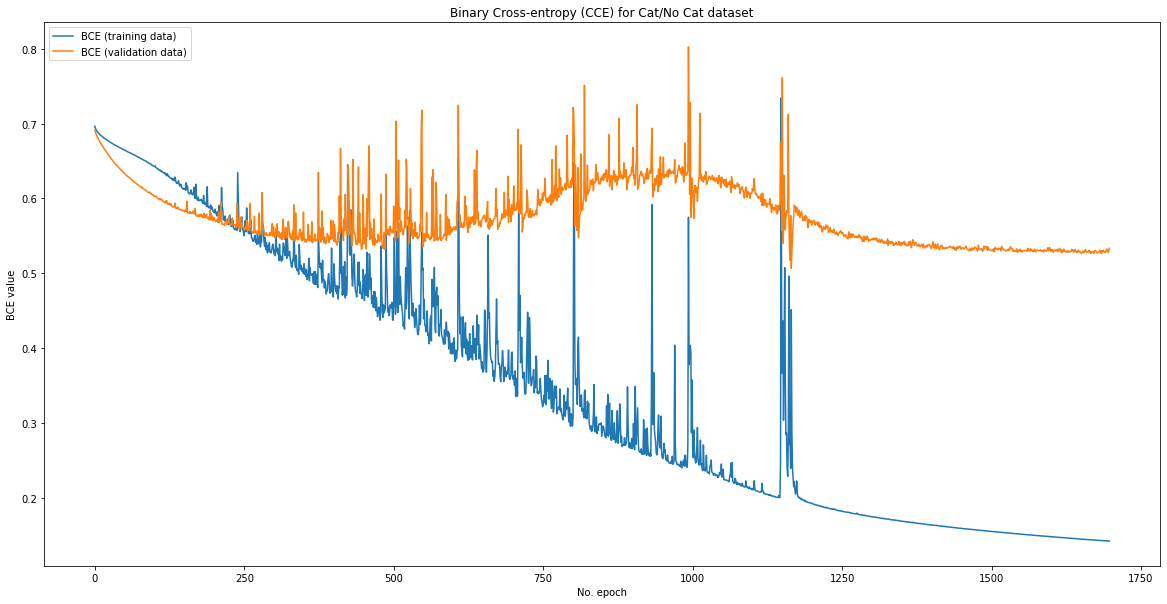

In [ ]:
# Plot history: MAE

fig, ax = plt.subplots( figsize = ( 20, 10 ) )

plt.plot( history.history[ 'loss' ][ 2 : ], label = 'BCE (training data)' )
plt.plot( history.history[ 'val_loss' ][ 2 : ], label = 'BCE (validation data)' )

plt.title( 'Categorical Cross-entropy (CCE) for Cat/No Cat dataset')
plt.ylabel( 'BCE value')
plt.xlabel( 'No. epoch')
plt.legend( loc = "upper left" )
plt.show()

## Confusion Matrix

In [ ]:
# Defining function for confusion matrix plot

def plot_confusion_matrix( y_true, y_pred, classes, normalize = False, title = None, cmap = plt.cm.Blues ) :
  '''
    title: Hands-on Guide To Implementing AlexNet With Keras For Multi-Class Image Classification
    source: https://analyticsindiamag.com/hands-on-guide-to-implementing-alexnet-with-keras-for-multi-class-image-classification/
  '''

  if not title:
      if normalize:
          title = 'Normalized confusion matrix'
      else:
          title = 'Confusion matrix, without normalization'

  # Compute confusion matrix

  cm = confusion_matrix( y_true, y_pred )
  
  if normalize:
      cm = cm.astype( 'float' ) / cm.sum( axis = 1 )[ :, np.newaxis ]
      print( "Normalized confusion matrix" )
  else:
      print( 'Confusion matrix, without normalization' )

  #Print Confusion matrix

  fig, ax = plt.subplots( figsize = ( 7, 7 ) )
  im = ax.imshow( cm, interpolation = 'nearest', cmap = cmap )
  ax.figure.colorbar( im, ax = ax )
  
  ax.set( xticks = np.arange( cm.shape[ 1 ] ),
          yticks = np.arange( cm.shape[ 0 ] ),
          xticklabels = classes, 
          yticklabels = classes,
          title = title,
          ylabel = 'True label',
          xlabel = 'Predicted label' )

  plt.setp( ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor" )
  
  # Loop over data dimensions and create text annotations.
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range( cm.shape[ 0 ] ):
    for j in range( cm.shape[ 1 ] ):
      ax.text( j, i, format( cm[ i, j ], fmt ),
              ha = "center", va = "center",
              color = "white" if cm[ i, j ] > thresh else "black" )
  
  fig.tight_layout()
  
  return ax

Confusion matrix, without normalization


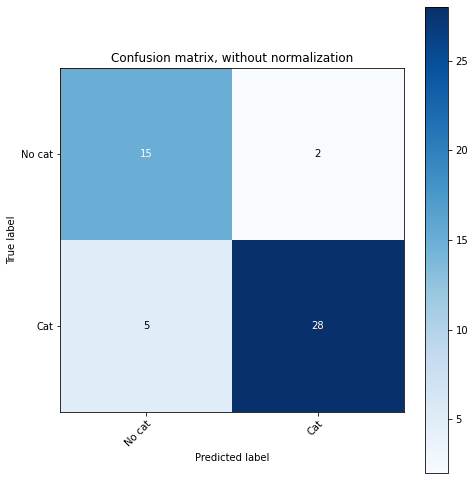

In [ ]:
from sklearn.metrics import confusion_matrix

np.set_printoptions( precision = 2 )

# y_pred = model.predict_classes( X_test )
y_pred = np.argmax( model.predict( X_test ), axis = 1 )
y_true = np.argmax( y_test, axis = 1 )

confusion_mtx = confusion_matrix( y_true, y_pred )
class_names = [ 'No cat', 'Cat' ]

plot_confusion_matrix( y_true, y_pred, classes = class_names )

# **Discusión de Resultados**

## Estructura de la Red

En este trabajo se implementó una arquitectura ZFNet. Aunnque la arquitectura define valores específicos para los filtros, capas de convolucion, capas de pooling y capas completamente-conectadas, existe más de una forma de implementar la red cumpliendo con las características especificadas. Partícularmente, la implemnetación aquí presentada, utilizó varias capas de Padding para poder obtener los valores específicados por la arquitectura. La tabla de abajo describe los componentes utilizados para la implementacion de la arquitectura ZFNet. Es importante notar las capas de ZeroPadding que fueron utilizadas para lograr que las capas de convolucion y poolinng produzcan salidas del tamaño especificado. 

| Layer Type       | Output Shape         | Parameter |
|------------------|----------------------|-----------|
| zero_padding2d   | (None, 226, 226, 3)  | 0         |
| conv2d           | (None, 110, 110, 96) | 14208     |
| zero_padding2d_1 | (None, 112, 112, 96) | 0         |
| max_pooling2d    | (None, 55, 55, 96)   | 0         |
| conv2d_1         | (None, 26, 26, 256)  | 614656    |
| zero_padding2d_2 | (None, 28, 28, 256)  | 0         |
| max_pooling2d_1  | (None, 13, 13, 256)  | 0         |
| conv2d_2         | (None, 13, 13, 384)  | 885120    |
| conv2d_3         | (None, 13, 13, 384)  | 1327488   |
| conv2d_4         | (None, 13, 13, 256)  | 884992    |
| max_pooling2d_2  | (None, 6, 6, 256)    | 0         |
| flatten          | (None, 9216)         | 0         |
| dense            | (None, 4096)         | 37752832  |
| dense_1          | (None, 4096)         | 16781312  |
| dense_2          | (None, 2)            | 8194      |

## Características del Dataset

El dataset utilizado fue el "Cat vs No Cat", el cuál ya había sido utilizado en un ejercicio anterior del curso de DL. El dataset conntiene 209 imaganes de dimension 64 * 64 * 3. El 3 corresponnde a los canales RGB de cada pixel. Las imagenes del dataset pertenecen ya sea a la clase Gato (105) o No Gato (154). Se observa que el dataset esta desvalanceado (2:3) en vafor de las clase No Gato. 

## Hiperparámetros 

Para el entrenamiento de la red se utilizaron los siguientes hyperparametros:
- 1700 epocas
- Batches de tamaño 50
- Regularización L2 (Ridge) con valor 0.05
- Optimizador SDG (Stochastic Gradiendt Descent) con Learning Rate = 0.01

## Resultados

Los resultados obtenidos por esta red otorgaron un accuracy de 86%. Estos resultados fueron teniendo un comportamiento diferente conforme las épocas fueron un incrementando. En la sección anterior se puede ver cómo antes de la época 250 el error sobre los datos de entrenamiento eran mayores que los de validación. Posteriormente, el error sobre los datos de validación eran mayores que los de entrenamiento. Después, apartir de la época 1000 las curvas de error para los dos conjunto de datos se empezaron a estabilizar. 

En cuánto a la matriz de confusión, se puede observar que sobre el conjunto de datos de test solo 5 imágenes de gato y 2 imágenes de no gatos fueron clasificadadas erróneas. Lo cual quiere decir que el modelo logró correctamente clasificar 43 imágenes de 50. 

Para finalizar, comparamos el accuracy del conjunto de datos test contra 2 tipos de redes que no usan una arquitectura ZFNET.

Comparación con otras redes:

+ 2-layer multiperceptron -> test accuracy 72%
* 4-layer multiperceptron -> test accuracy 80%
* ZFNET -> test accuracy 86% 

Los resultados de nuestra red son mejores que los de otras redes con arquitecturas diferentes que se realizaron en otras tareas. Esto quiere decir que usar este tipo de arquitectura otorga mejores resultados para clasificación de imágenes.

